W1015 04:31:59.091000 1199 torch/utils/cpp_extension.py:118] No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


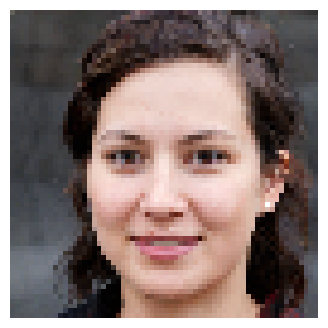

In [1]:
import os, sys, torch, urllib.request, torchvision
from torchvision.utils import save_image, make_grid
import matplotlib.pyplot as plt

# Clone repo if needed
if not os.path.exists('stylegan2-ada-pytorch'):
    os.system('git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git')
sys.path.append('stylegan2-ada-pytorch')

# Download pretrained model
if not os.path.exists('ffhq.pkl'):
    urllib.request.urlretrieve('https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl','ffhq.pkl')

# Generate small image
import legacy
dev = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
G = legacy.load_network_pkl(open('ffhq.pkl','rb'))['G_ema'].to(dev)
z = torch.randn([1, G.z_dim], device=dev)
label = torch.zeros([1, G.c_dim], device=dev)
img = (G(z, label, truncation_psi=0.5, noise_mode='const') + 1) / 2

# Downsize for speed & save
os.makedirs('generated_images', exist_ok=True)
img_small = torch.nn.functional.interpolate(img, size=64)
save_image(img_small, 'generated_images/fake.png')

# Display image
plt.figure(figsize=(4,4))
plt.imshow(make_grid(img_small, nrow=1).permute(1,2,0).cpu())
plt.axis('off'); plt.show()
